# Generic Data Importer Notebook & User Defined Models
---

[Authors] ARL & ERGM

---

This Notebook aims to show an example of importing generic data into PyFolding and fitting it with a user defined model. Once you have tested it here you can add it to your models.py from the PyFolding installation and setup PyFolding again to incorporate it into your local copy or simply copy it into whichever notebook you are using.

### So as always lets load up PyFolding:

---


In [1]:
#First off let's load pyfolding & pyplot into this ipython notebook
# (pyplot allows us to plot more complex figures of our results):

%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

# NOTE: This section just autogenerates a CSV file of data to be imported using the generic importer

---



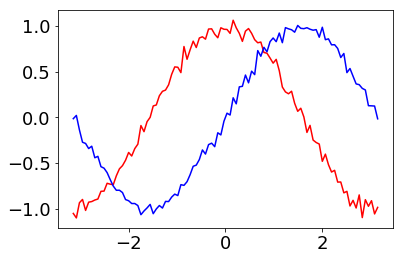

Writing .csv file (../examples/waves.csv)...


In [2]:
from pyfolding import utils
from collections import OrderedDict
x = np.linspace(-np.pi, np.pi, 100)
y_cos = np.cos(x) + np.random.randn(len(x))*0.05
y_sin = np.sin(x) + np.random.randn(len(x))*0.05

plt.figure()
plt.plot(x, y_cos,'r-', x, y_sin,'b-')
plt.show()

data = OrderedDict([('x',x),('cos',y_cos),('sin',y_sin)])

utils.write_CSV('../examples/waves.csv', data)

---

# Loading an arbitrary data set

Here we will load a data set which contains sine and cosine functions over the range $(-\pi,\pi]$ to demonstrate how PyFolding can deal with arbitrary datasets. We will then plot and fit a simple mode to recover the amplitude and phase of the waves.

---

In [3]:
# loading the data - The kinetics of each protein is in one .csv 
# as per PyFolding SI Notebooks 1 and 2

pth = "../examples/"
wave_data = pyfolding.read_generic_data(pth,"waves.csv")

In [4]:
print wave_data

---

### We can use this generic object as we would any other

For example, let's extract the datasets found within, and plot x versus y (y defaults to the first label, e.g. 'cos' in this case)

---


In [5]:
print wave_data.labels

['x', 'cos', 'sin']


In [6]:
print wave_data.x

[-3.14159265 -3.07812614 -3.01465962 -2.9511931  -2.88772658 -2.82426006
 -2.76079354 -2.69732703 -2.63386051 -2.57039399 -2.50692747 -2.44346095
 -2.37999443 -2.31652792 -2.2530614  -2.18959488 -2.12612836 -2.06266184
 -1.99919533 -1.93572881 -1.87226229 -1.80879577 -1.74532925 -1.68186273
 -1.61839622 -1.5549297  -1.49146318 -1.42799666 -1.36453014 -1.30106362
 -1.23759711 -1.17413059 -1.11066407 -1.04719755 -0.98373103 -0.92026451
 -0.856798   -0.79333148 -0.72986496 -0.66639844 -0.60293192 -0.53946541
 -0.47599889 -0.41253237 -0.34906585 -0.28559933 -0.22213281 -0.1586663
 -0.09519978 -0.03173326  0.03173326  0.09519978  0.1586663   0.22213281
  0.28559933  0.34906585  0.41253237  0.47599889  0.53946541  0.60293192
  0.66639844  0.72986496  0.79333148  0.856798    0.92026451  0.98373103
  1.04719755  1.11066407  1.17413059  1.23759711  1.30106362  1.36453014
  1.42799666  1.49146318  1.5549297   1.61839622  1.68186273  1.74532925
  1.80879577  1.87226229  1.93572881  1.99919533  2.

In [7]:
print wave_data.y

[ -1.05184198e+00  -1.10086036e+00  -9.34577866e-01  -8.98684831e-01
  -1.01876844e+00  -9.28422902e-01  -9.21834189e-01  -9.05072298e-01
  -8.94156059e-01  -8.09748407e-01  -8.07323495e-01  -7.21774418e-01
  -7.31338883e-01  -7.37619719e-01  -6.40085902e-01  -5.63761858e-01
  -5.28692200e-01  -4.69408225e-01  -3.84358928e-01  -4.23246500e-01
  -3.42038709e-01  -2.93540838e-01  -8.99022064e-02  -1.56712701e-01
  -4.70741508e-02   2.21520170e-04   1.24822637e-01   1.35374655e-01
   2.36447385e-01   2.84709078e-01   2.98650228e-01   3.56154884e-01
   4.71149537e-01   5.51995373e-01   5.48471932e-01   4.89630950e-01
   7.75252581e-01   6.35591971e-01   7.39330183e-01   8.34019948e-01
   7.64425698e-01   8.68623007e-01   8.81952824e-01   8.55746330e-01
   9.66528664e-01   9.68849809e-01   9.09940500e-01   8.71076422e-01
   9.80475110e-01   9.64203100e-01   9.62147890e-01   9.19320898e-01
   1.06287708e+00   9.79996528e-01   9.19656691e-01   8.31644631e-01
   9.43496470e-01   9.71987785e-01

---

### Plotting arbitrary data and fitting to other models
Note that we can call plot and fit this to an arbitrary function (i.e. it doesn't have to be anything to do with protein folding) using all of the same tools

---

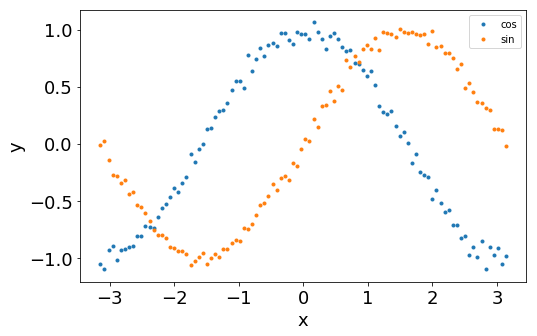

In [8]:
wave_data.plot()

---

### Let's define a sinusoidal model with phase and amplitude
We can use this to extract the amplitude and phase of the waves...

---

In [9]:
class Wave(pyfolding.FitModel):
    """ Sine wave with amplitude and phase
    """
    def __init__(self):
        pyfolding.FitModel.__init__(self)
        fit_args = self.fit_func_args
        self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
        self.default_params = np.array([1., 0.])



    def fit_func(self, x, amplitude, phase):    
        return amplitude*np.sin(x+phase)

In [10]:
wave_data.fit_func = Wave
wave_data.fit()

Fitting results
ID: waves
Model: Wave
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) amplitude    1.00419 ± 0.00045    	 95% CI[   1.00408,    1.00431]
(f) phase        1.55891 ± 0.00045    	 95% CI[   1.55879,    1.55902]
--------------------------------------------------------------------------------
R^2: 0.99389




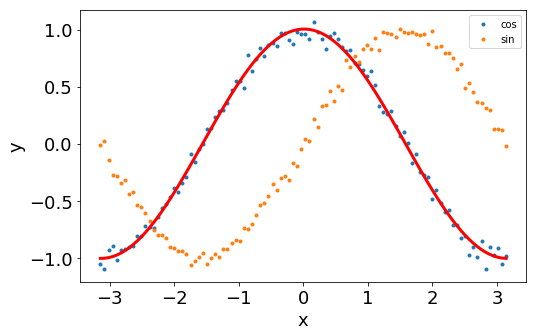

In [11]:
wave_data.plot()

In [12]:
print np.pi/2

1.57079632679


---

#### End of Notebook

---